,Description,Value
0,Session id,6797
1,Target,type
2,Target type,Binary
3,Original data shape,"(2621, 10)"
4,Transformed data shape,"(2621, 7)"
5,Transformed train set shape,"(1834, 7)"
6,Transformed test set shape,"(787, 7)"
7,Ignore features,3
8,Numeric features,6
9,Rows with missing values,80.7%


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9962,0.6721,0.9806,1.0000,0.9901,0.9877,0.9879,0.0960
ada,Ada Boost Classifier,0.9962,0.6680,0.9806,1.0000,0.9901,0.9877,0.9879,0.0560
gbc,Gradient Boosting Classifier,0.9962,0.6591,0.9806,1.0000,0.9901,0.9877,0.9879,0.0570
lightgbm,Light Gradient Boosting Machine,0.9962,0.6669,0.9806,1.0000,0.9901,0.9877,0.9879,0.0340
dt,Decision Tree Classifier,0.9956,0.6191,0.9806,0.9973,0.9887,0.9860,0.9862,0.0170
et,Extra Trees Classifier,0.9956,0.9504,0.9806,0.9973,0.9887,0.9860,0.9862,0.0740
lr,Logistic Regression,0.9945,0.9816,0.9722,1.0000,0.9857,0.9823,0.9826,0.4790
knn,K Neighbors Classifier,0.9945,0.6249,0.9722,1.0000,0.9857,0.9823,0.9826,0.0350
svm,SVM - Linear Kernel,0.9875,0.0000,0.9722,0.9694,0.9692,0.9613,0.9626,0.0160
nb,Naive Bayes,0.9624,0.5000,0.9972,0.8446,0.9136,0.8899,0.8956,0.0140


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9962,0.9967,0.9806,1.0000,0.9902,0.9878,0.9879


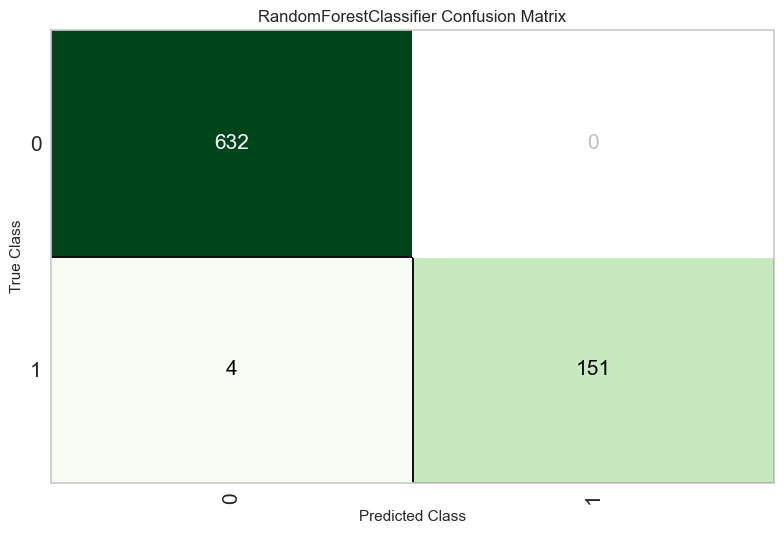

In [4]:
import pandas as pd
from pycaret.classification import *

from http.server import SimpleHTTPRequestHandler, HTTPServer
from urllib import request, error
import urllib.parse
import sys

badWords=['sleep','drop','uid','select','waitfor','delay','system','union','group by','order by']
def extractFeatures(path_enc):
    path=urllib.parse.unquote(path_enc)
    badWords_count=0
    single_q=path.count("'")
    double_q=path.count("\"")
    dashes=path.count("--")
    braces=path.count("(")
    spaces=path.count(" ")
    for word in badWords:
        badWords_count+=path.count(word)
    data_list=[single_q,double_q,dashes,braces,spaces,badWords_count]
    print(data_list)
    return pd.DataFrame([data_list],columns=['single_q','double_q','dashes','braces','spaces','badWords'])

data=pd.read_csv(r'C:\Master\An1\sem2\Cyber Security\Project\ClasificationDataset\ClasificationDataset.csv')
#data=pd.read_excel('C:\Master\An1\sem2\Cyber Security\Project\Dataset\Dataset.xlsx')
classifier1=setup(data=data,normalize=True,numeric_features=["single_q","double_q","dashes","braces","spaces","badWords"],target='type',ignore_features=['method','path','body'])

classifier_firewall=compare_models()
#plot_model(cluster_firewall)
#plot_model(cluster_firewall, plot='cluster')

#save_model(classifier_firewall,'firewall_classifierModel')


predictions=predict_model(classifier_firewall,data=data)
predictions.head()

plot_model(classifier_firewall,'confusion_matrix')

predictions.to_csv('C:\Master\An1\sem2\Cyber Security\Project\ClasificationDataset\Clasification_result.csv')


In [9]:
save_model(classifier_firewall,'firewall_classifierModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['single_q', 'double_q', 'dashes',
                                              'braces', 'spaces', 'badWords'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
                  TransformerWrapper(excl...
                                     transformer=StandardScaler(copy=True,
                                                        

In [5]:
classifier_firewall=load_model('firewall_classifierModel')
class MyHTTPProxy(SimpleHTTPRequestHandler):
    proxy_routes={}

    @classmethod
    def set_routes(cls,proxy_routes):
        cls.proxy_routes=proxy_routes

    def do_GET(self):
        parts=self.path.split('/')
        print(parts)
        live_data=extractFeatures(parts[3])
        result=predict_model(classifier_firewall,data=live_data)
        print(result)
        if result['prediction_label'][0]==0:
            print("Malicious HTTP request")
        if len(parts)>=2:
            self.proxy_request("http://"+parts[2]+"/")
        else:
            super().do_GET()

    def proxy_request(self,url):
        try:
            response=request.urlopen(url)
        except error.HTTPError as err:
            print('error')
            self.send_response_only(err.code)
            self.end_headers()
            return
        self.send_response_only(response.status)
        for name, value in response.headers.items():
            self.send_header(name, value)
        self.end_headers()
        self.copyfile(response,self.wfile)

MyHTTPProxy.set_routes({'proxy_route':'http://demo.testfire.net/'})
with HTTPServer(('127.0.0.1',8080),MyHTTPProxy) as httpd:
    host, port=httpd.socket.getsockname()
    print(f'Listening on http://{host}:{port}')
    try:
        httpd.serve_forever()
    except KeyboardInterrupt:
        print('Proxy was stopped by KeyboardInterrupt')
        
            
            

Transformation Pipeline and Model Successfully Loaded
Listening on http://127.0.0.1:8080
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=+AS+INJECTX+WHERE+1%3D1+AND+1%3D0']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=+ORDER+BY+1%2CSLEEP%285%29%2CBENCHMARK%281000000%2CMD5%28%27A%27%29%29%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16']
[2, 0, 0, 3, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         2         0       0       3       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%22+or+%22%22+%22']
[0, 4, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         4       0       0       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%22+or+%22%22+%22']
[0, 4, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         4       0       0       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=admin%27or+1%3D1+or+%27%27%3D%27']
[4, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         4         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=admin%27or+1%3D1+or+%27%27%3D%27']
[4, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         4         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=admin%27%29+or+%271%27%3D%271%27%23']
[5, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         5         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  


127.0.0.1 - - [14/May/2024 15:03:56] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [14/May/2024 15:03:56] "CONNECT safebrowsing.googleapis.com:443 HTTP/1.1" 501 -


['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=1234+%27+AND+1%3D0+UNION+ALL+SELECT+%27admin%27%2C+%2781dc9bdb52d04dc20036dbd8313ed055']
[4, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         4         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=1234+%27+AND+1%3D0+UNION+ALL+SELECT+%27admin%27%2C+%27admin%22%29+or+%28%221%22%3D%221%22--']
[4, 5, 1, 1, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         4         5       1       1       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=admin%22%29+or+%221%22%3D%221%22%2F*']
[0, 5, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         5       0       0       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=1234+%22+AND+1%3D0+UNION+ALL+SELECT+%22admin%22%2C+%2281dc9bdb52d04dc20036dbd8313ed055']
[0, 4, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         4       0       0       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=admin%22+or+%221%22%3D%221']
[0, 4, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         4       0       0       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=admin%27+or+1%3D1']
[1, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         1         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=admin%27+or+1%3D1']
[1, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         1         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=or+1%3D1%2F*']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=or+1%3D1%2F*']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%22%29%29+or+%28%28%22x%22%29%29%3D%28%28%22x']
[0, 4, 0, 4, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         4       0       4       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%22+or+%22%22%26%22']
[0, 4, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         4       0       0       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%22%26%22']
[0, 2, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         2       0       0       0         0                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%27+or+%27%27%26%27']
[4, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         4         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=+UNION+ALL+SELECT+%27INJ%27%7C%7C%27ECT%27%7C%7C%27XXX%27%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%2C23%2C24%2C25%23']
[6, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         6         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=+UNION+ALL+SELECT+%27INJ%27%7C%7C%27ECT%27%7C%7C%27XXX%27%2C2%2C3%2C4%2C5%2C6%2C7%2C8%2C9%2C10%2C11%2C12%2C13%2C14%2C15%2C16%2C17%2C18%2C19%2C20%2C21%2C22%23']
[6, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         6         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%27%26%27']
[2, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         2         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%27%26%27']
[2, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         2         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  


127.0.0.1 - - [14/May/2024 15:06:49] code 501, message Unsupported method ('CONNECT')
127.0.0.1 - - [14/May/2024 15:06:49] "CONNECT spocs.getpocket.com:443 HTTP/1.1" 501 -


['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=waitfor+delay+%2700%3A00%3A05%27--']
[2, 0, 1, 0, 0, 2]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         2         0       1       0       0         2                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=benchmark%2850000000%2CMD5%281%29%29%23']
[0, 0, 0, 2, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       2       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%28SELECT+*+FROM+%28SELECT%28SLEEP%285%29%29%29ecMj%29']
[0, 0, 0, 4, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       4       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%2Bbenchmark%283200%2CSHA1%281%29%29%2B%27']
[1, 0, 0, 2, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         1         0       0       2       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=AND+%28SELECT+*+FROM+%28SELECT%28SLEEP%285%29%29%29nQIP%29--']
[0, 0, 1, 4, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       1       4       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=AND+%28SELECT+*+FROM+%28SELECT%28SLEEP%285%29%29%29nQIP%29--']
[0, 0, 1, 4, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       1       4       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'demo.testfire.net', 'search.jsp?query=%22%29%3Bwaitfor+delay+%270%3A0%3A5%27--']
[2, 1, 1, 0, 0, 2]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         2         1       1       0       0         2                 0   

   prediction_score  
0               1.0  
Malicious HTTP request
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
['http:', '', 'detectportal.firefox.com', 'canonical.html']
[0, 0, 0, 0, 0, 0]


   single_q  double_q  dashes  braces  spaces  badWords  prediction_label  \
0         0         0       0       0       0         0                 1   

   prediction_score  
0               1.0  
Proxy was stopped by KeyboardInterrupt
